In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
penguins_origin = sns.load_dataset("penguins")

In [11]:
penguins_origin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [12]:
penguins_origin.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [13]:
penguins_origin.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


# 예제 1: 임의 표본 추출과 표본 평균 비교

In [14]:
penguins = penguins_origin.copy()

In [15]:
# 결측값을 제거
penguins = penguins.dropna()

In [16]:
# 모집단의 몸무게(body_mass_g) 평균을 계산
population_mean = penguins["body_mass_g"].mean()

In [17]:
print(population_mean)

4207.057057057057


In [30]:
# 30개씩 랜덤 샘플을 1000번 추출하여 표본 평균을 구함

sample_means = []  # 표본 평균을 저장할 리스트

for _ in range(1000):
    sample = penguins["body_mass_g"].sample(n=30, replace=True)  # 30개 랜덤 샘플 추출 (복원추출)
    sample_mean = sample.mean()  # 표본 평균 계산
    sample_means.append(sample_mean)  # 리스트에 저장


In [31]:
print(sample_means)

[4145.0, 4044.1666666666665, 4231.666666666667, 4299.166666666667, 4270.0, 4312.5, 4310.0, 4049.1666666666665, 4149.166666666667, 4615.833333333333]


In [38]:
# 리스트 컴프리헨션 사용
sample_means = [penguins["body_mass_g"].sample(30, replace=True).mean() for _ in range(1000)]

In [39]:
print(sample_means)

[4191.666666666667, 4200.0, 4074.1666666666665, 4157.5, 4067.5, 4350.833333333333, 4235.0, 4187.5, 4535.0, 4285.833333333333, 3977.5, 4286.666666666667, 4172.5, 4282.5, 4475.0, 4242.5, 4214.166666666667, 4240.0, 4298.333333333333, 4260.0, 4263.333333333333, 4410.0, 4115.0, 4063.3333333333335, 4073.3333333333335, 4121.666666666667, 4151.666666666667, 4000.8333333333335, 4360.0, 4000.8333333333335, 4319.166666666667, 4485.833333333333, 4074.1666666666665, 3984.1666666666665, 4277.5, 4485.0, 4404.166666666667, 4176.666666666667, 3978.3333333333335, 4480.833333333333, 4153.333333333333, 4089.1666666666665, 4232.5, 4221.666666666667, 4201.666666666667, 4237.5, 4132.5, 4005.8333333333335, 4264.166666666667, 4263.333333333333, 4340.0, 4132.5, 4239.166666666667, 4101.666666666667, 4200.0, 3965.8333333333335, 4298.333333333333, 3855.0, 4292.5, 4148.333333333333, 4298.333333333333, 4260.833333333333, 4446.666666666667, 4077.5, 4218.333333333333, 4046.6666666666665, 4342.5, 4206.666666666667, 433

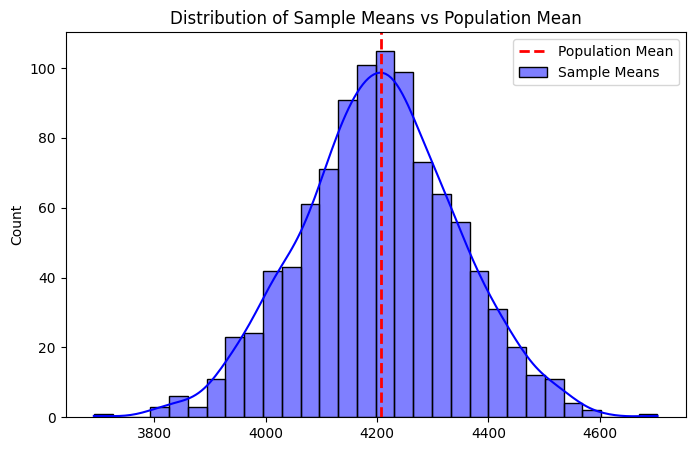

In [40]:
# 표본 평균의 분포를 시각화

# 1. 그래프 크기 설정
# 그래프의 크기를 너비 8, 높이 5로 설정
plt.figure(figsize=(8, 5))

# 2. 표본 평균들의 히스토그램 시각화
sns.histplot(sample_means, kde=True, bins=30, color='blue', label='Sample Means')
# sample_means 리스트(또는 배열)에 저장된 표본 평균들을 히스토그램으로 표현
# kde=True: 커널 밀도 추정(KDE) 그래프를 추가하여 분포를 부드럽게 표현
# bins=30: 히스토그램을 30개의 구간(bin)으로 분할
# color='blue': 그래프 색상을 파란색으로 설정
# label='Sample Means': 범례(Label) 표기


# 3. 모집단 평균선을 추가
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')

# 모집단 평균 (population_mean) 을 세로선(axvline) 으로 표시
# color='red': 색상을 빨간색으로 설정
# linestyle='dashed': 점선(dashed) 스타일로 표시
# linewidth=2: 선의 두께를 2로 설정
# label='Population Mean': 범례에 "Population Mean" 라벨 추가

# 4. 범례 추가
plt.legend()
# 그래프에서 범례(Legend) 를 추가하여, 그래프에 표시된 요소들의 의미를 표현

plt.title("Distribution of Sample Means vs Population Mean")  # 그래프 제목 설정
plt.show()